# 二次元配列と勾配問題

## 【問題1】1次関数
### xが-50から50の範囲で次の式を考えます。
### -50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [56]:
import numpy as np
x_array_1 = np.arange(-50, 50.1, 0.1) # (1001,)
print(x_array_1)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]


In [57]:
#x = np.array([ x_array])
y_array_1 = 1/2 * x_array_1+1 # (1, 1001)

## 【問題2】配列の結合

### 問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [58]:
y_1_array = y_array_1.reshape(1001,) # (1001,)

In [59]:
xy_array_1 = np.stack([x_array_1, y_1_array], axis=1) # (1001, 2)
print(xy_array_1.shape)

(1001, 2)


## 【問題3】勾配を求める
### 各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

In [60]:
#y変化量
y_change = y_1_array[1:] - y_1_array[:-1]  # (1000,)

#x変化量
x_change = x_array_1[1:] - x_array_1[:-1] # (1000,)

# 勾配
gradient =  y_change / x_change # (1000,)

## 【問題4】グラフを描く
### 1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

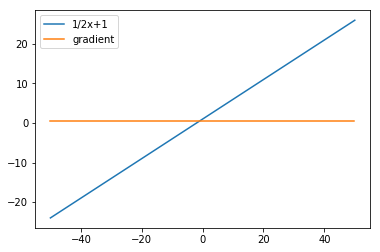

In [61]:
import matplotlib.pyplot as plt

# x_array_gradient = np.arange(-49.9, 50.1, 0.1) # (1000,)
x_array_gradient = np.arange(-50, 50, 0.1)
plt.plot(x_array_1, y_1_array, label="1/2x+1")
plt.plot(x_array_gradient, gradient, label="gradient")
plt.legend()
plt.show()

## 【問題5】Pythonの関数化
### 問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。
### そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。
### また、問題4と同様にグラフを描いてください。
### ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

> y = 1/2 * x + 1 ( -50 <= x 50 )

In [62]:
def compute_gradient(y_array, x_min, x_max, x_step):
    """
    変化量を使い勾配を計算する。
    Parameters
    ----------------
    y_array : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    # x_array = np.arange(x_min, (x_max+x_step), x_step)
    # y_array = 1/2 * x_array + 1
    # 各xに対する値算出のため
    a = int( (x_max - x_min) / x_step + 1)
    
    x_array = np.arange(x_range_min, x_range_max+x_step, x_step)
    
    y_1_array = y_array.reshape(a,) 
    array_xy = np.stack([x_array, y_1_array], axis=1) 
    
    #y変化量
    y_change = y_1_array[1:] - y_1_array[:-1]  

    #x変化量
    x_change = x_array[1:] - x_array[:-1] 

    # 勾配
    gradient =  y_change / x_change 
     
    pass
    return array_xy, gradient 

x_range_min = -50
x_range_max = 50
x_step = 0.1
x_array = np.arange(x_range_min, (x_range_max+x_step), x_step)
y_array = 1/2 * x_array+1

array_xy, gradient = compute_gradient(y_array, x_range_min, x_range_max, x_step)

array_xy_0 = array_xy[:, 1]
min_0 = np.argmin(array_xy_0)
print("最小値のインデックスは[{}] , 最小値は{}".format(min_0, array_xy_0[min_0])) 
print("最小のyをとる前後の勾配は　{}".format(gradient[min_0])) 

最小値のインデックスは[0] , 最小値は-24.0
最小のyをとる前後の勾配は　0.5


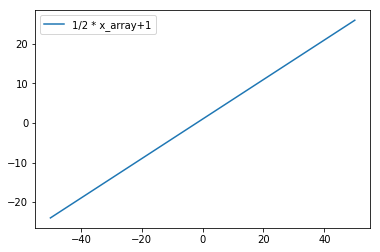

In [63]:
plt.plot(x_array, array_xy[:, 1], label="1/2 * x_array+1")
plt.legend()
plt.show()

> y = x^2 ( -50 <= x 50 )

最小値のインデックスは[500] , 最小値は5.048709793414476e-25
最小のyをとる前後の勾配は　0.1000000000014225


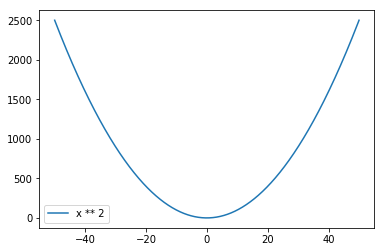

In [64]:
def compute_gradient(y_array, x_min, x_max, x_step):
    """
    変化量を使い勾配を計算する。
    Parameters
    ----------------
    y_array : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    # x_array = np.arange(x_min, (x_max+x_step), x_step)
    # y_array = 1/2 * x_array + 1
    # 各xに対する値算出のため
    a = int( (x_max - x_min) / x_step + 1)
    
    x_array = np.arange(x_range_min, x_range_max+x_step, x_step)
    
    y_1_array = y_array.reshape(a,) 
    array_xy = np.stack([x_array, y_1_array], axis=1) 
    
    #y変化量
    y_change = y_1_array[1:] - y_1_array[:-1]  

    #x変化量
    x_change = x_array[1:] - x_array[:-1] 

    # 勾配
    gradient =  y_change / x_change 
     
    pass
    return array_xy, gradient 

x_range_min = -50
x_range_max = 50
x_step = 0.1
x_array = np.arange(x_range_min, (x_range_max+x_step), x_step)
y_array = x_array ** 2

array_xy, gradient = compute_gradient(y_array, x_range_min, x_range_max, x_step)

array_xy_0 = array_xy[:, 1]
min_0 = np.argmin(array_xy_0)
print("最小値のインデックスは[{}] , 最小値は{}".format(min_0, array_xy_0[min_0])) 
print("最小のyをとる前後の勾配は　{}".format(gradient[min_0])) 

plt.plot(x_array, array_xy[:, 1], label="x ** 2")
plt.legend()
plt.show()

> y = 2* x^2 + 2^x ( -50 <= x 50 )

最小値のインデックスは[498] , 最小値は0.9505505632959851
最小のyをとる前後の勾配は　0.024824282409972788


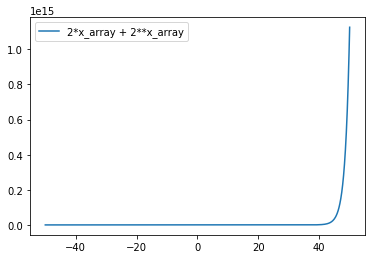

In [65]:
def compute_gradient(y_array, x_min, x_max, x_step):
    """
    変化量を使い勾配を計算する。
    Parameters
    ----------------
    y_array : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    # x_array = np.arange(x_min, (x_max+x_step), x_step)
    # y_array = 1/2 * x_array + 1
    # 各xに対する値算出のため
    a = int( (x_max - x_min) / x_step + 1)
    
    x_array = np.arange(x_range_min, x_range_max+x_step, x_step)
    
    y_1_array = y_array.reshape(a,) 
    array_xy = np.stack([x_array, y_1_array], axis=1) 
    
    #y変化量
    y_change = y_1_array[1:] - y_1_array[:-1]  

    #x変化量
    x_change = x_array[1:] - x_array[:-1] 

    # 勾配
    gradient =  y_change / x_change 
     
    pass
    return array_xy, gradient 

x_range_min = -50
x_range_max = 50
x_step = 0.1
x_array = np.arange(x_range_min, (x_range_max+x_step), x_step)
y_array = 2*x_array**2 + 2**x_array

array_xy, gradient = compute_gradient(y_array, x_range_min, x_range_max, x_step)

array_xy_0 = array_xy[:, 1]
min_0 = np.argmin(array_xy_0)
print("最小値のインデックスは[{}] , 最小値は{}".format(min_0, array_xy_0[min_0])) 
print("最小のyをとる前後の勾配は　{}".format(gradient[min_0])) 

plt.plot(x_array, array_xy[:, 1], label="2*x_array + 2**x_array")
plt.legend()
plt.show()

> y = sin( x^1/2 ) ( -50 <= x 50 )

最小値のインデックスは[343] , 最小値は-0.9999920733059178
最小のyをとる前後の勾配は　0.014487279313259787


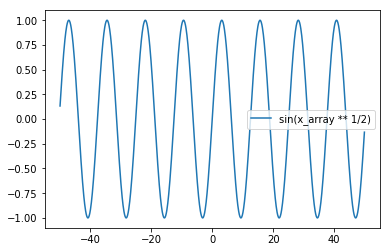

In [66]:
def compute_gradient(y_array, x_min, x_max, x_step):
    """
    変化量を使い勾配を計算する。
    Parameters
    ----------------
    y_array : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    # x_array = np.arange(x_min, (x_max+x_step), x_step)
    # y_array = 1/2 * x_array + 1
    # 各xに対する値算出のため
    a = int( (x_max - x_min) / x_step + 1)
    
    x_array = np.arange(x_range_min, x_range_max+x_step, x_step)
    
    y_1_array = y_array.reshape(a,) 
    array_xy = np.stack([x_array, y_1_array], axis=1) 
    
    #y変化量
    y_change = y_1_array[1:] - y_1_array[:-1]  

    #x変化量
    x_change = x_array[1:] - x_array[:-1] 

    # 勾配
    gradient =  y_change / x_change 
     
    pass
    return array_xy, gradient 

x_range_min = -50
x_range_max = 50
x_step = 0.1
x_array = np.arange(x_range_min, (x_range_max+x_step), x_step)
# y_array = x_array ** 2
y_array = np.sin(x_array ** 1/2)

array_xy, gradient = compute_gradient(y_array, x_range_min, x_range_max, x_step)

array_xy_0 = array_xy[:, 1]
min_0 = np.argmin(array_xy_0)
print("最小値のインデックスは[{}] , 最小値は{}".format(min_0, array_xy_0[min_0])) 
print("最小のyをとる前後の勾配は　{}".format(gradient[min_0])) 

plt.plot(x_array, array_xy[:, 1], label="sin(x_array ** 1/2)")
plt.legend()
plt.show()

## 【問題6】最小値を求める
### 問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。
### 今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。
### また、最小のyをとる前後の勾配を表示してください。

> y = x ^ 2 ( -50 <= x 50 )

最小値のインデックスは[500] , 最小値は5.048709793414476e-25

最小のyをとる前後の勾配は　0.1000000000014225

> y = 2* x^2 + 2^x ( -50 <= x 50 )

最小値のインデックスは[498] , 最小値は0.9505505632959851

最小のyをとる前後の勾配は　0.024824282409972788

> y = sin( x^1/2 ) ( -50 <= x 50 )

最小値のインデックスは[343] , 最小値は-0.9999920733059178

最小のyをとる前後の勾配は　0.014487279313259787